In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


**Understanding the data**

In [15]:
adult_df = pd.read_csv('adult.csv')
adult_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
adult_df.shape


(32561, 15)

In [5]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [17]:
categorical_cols = adult_df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(adult_df[col].value_counts())
    print("-" * 50)


Value counts for workclass:
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
--------------------------------------------------

Value counts for education:
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
--------------------------------------------------

Value counts for marital.status:
marital.status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed  

In [18]:
import numpy as np
adult_df.replace("?", np.nan, inplace=True)

In [19]:
print(adult_df.isnull().sum())


age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


In [21]:
adult_df.dropna(inplace=True)
adult_df.shape

(30162, 15)

In [23]:
adult_df["income"].value_counts()

income
<=50K    22654
>50K      7508
Name: count, dtype: int64

In [24]:
adult_df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**Exploratory Data Analysis (EDA)**

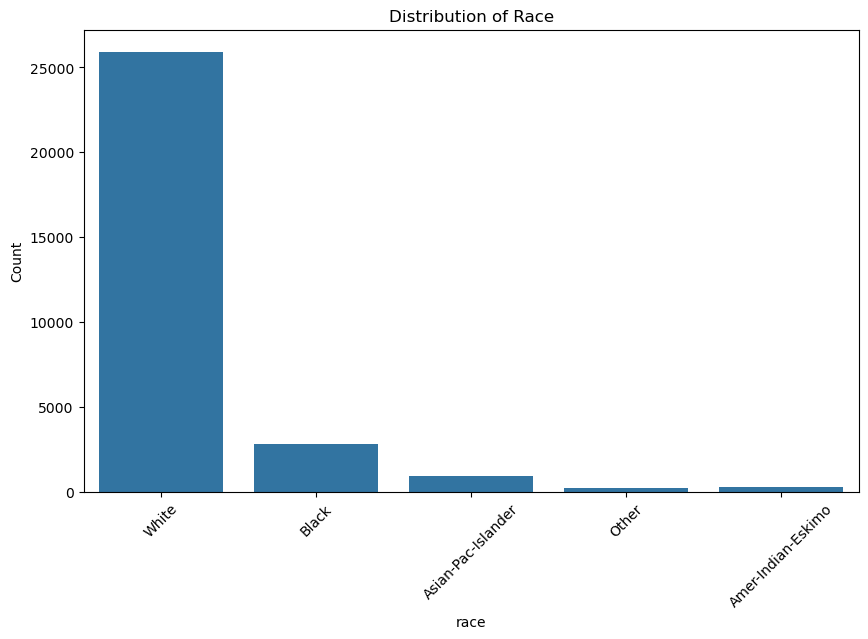

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(data=adult_df, x='race')
plt.title('Distribution of Race')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

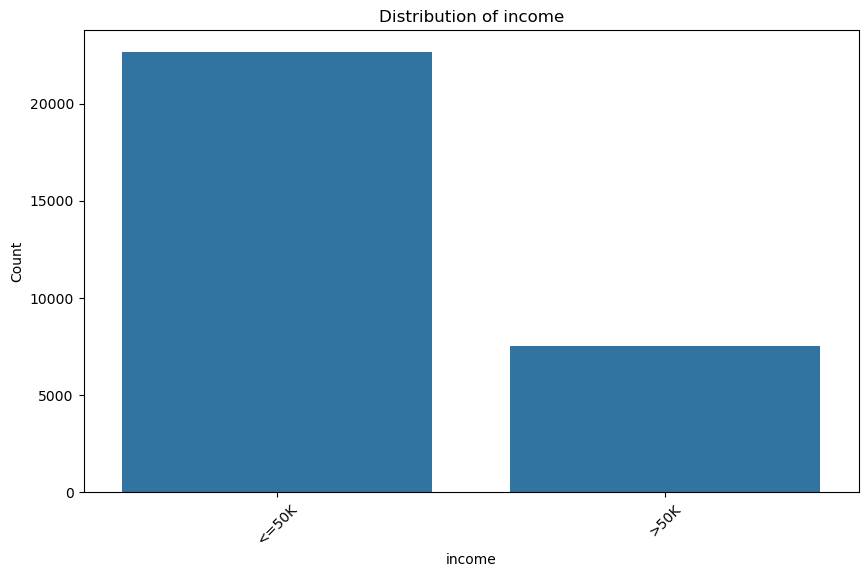

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=adult_df, x='income')
plt.title('Distribution of income')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

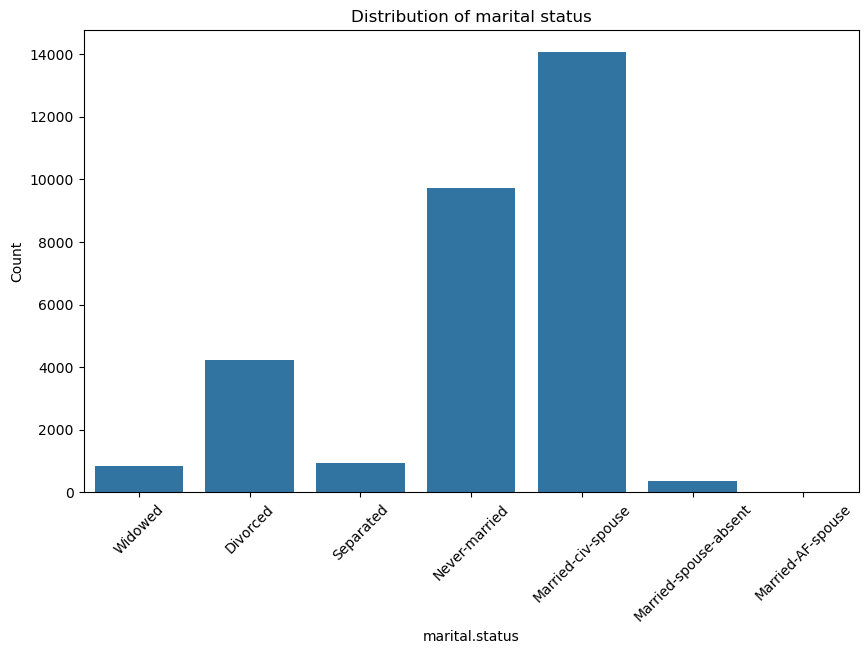

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=adult_df, x='marital.status')
plt.title('Distribution of marital status')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

In [28]:
adult_df =pd.get_dummies(adult_df, columns=['workclass', 'education', 'marital.status', 'occupation', 
    'relationship', 'race', 'sex', 'native.country'])

adult_df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
1,82,132870,9,0,4356,18,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,54,140359,4,0,3900,40,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4,41,264663,10,0,3900,40,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
5,34,216864,9,0,3770,45,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False
6,38,150601,6,0,3770,40,<=50K,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
X = adult_df.drop(columns=['income'])
y = adult_df['income'] 

X_train , X_test, y_train , y_test = train_test_split(X,y ,test_size= 0.2 , random_state= 42)

In [30]:
models = [RandomForestClassifier() , 
          DecisionTreeClassifier()] 

for model in models : 
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(model)
    print(classification_report(y_test, y_pred))

RandomForestClassifier()
              precision    recall  f1-score   support

       <=50K       0.88      0.91      0.89      4533
        >50K       0.70      0.61      0.65      1500

    accuracy                           0.84      6033
   macro avg       0.79      0.76      0.77      6033
weighted avg       0.83      0.84      0.83      6033

DecisionTreeClassifier()
              precision    recall  f1-score   support

       <=50K       0.87      0.88      0.87      4533
        >50K       0.62      0.59      0.61      1500

    accuracy                           0.81      6033
   macro avg       0.74      0.74      0.74      6033
weighted avg       0.81      0.81      0.81      6033



In [31]:
clf = RandomForestClassifier(class_weight="balanced")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('random forest')
print(classification_report(y_test,y_pred))

random forest
              precision    recall  f1-score   support

       <=50K       0.88      0.90      0.89      4533
        >50K       0.68      0.63      0.65      1500

    accuracy                           0.83      6033
   macro avg       0.78      0.76      0.77      6033
weighted avg       0.83      0.83      0.83      6033



PR-AUC Score: 0.7268


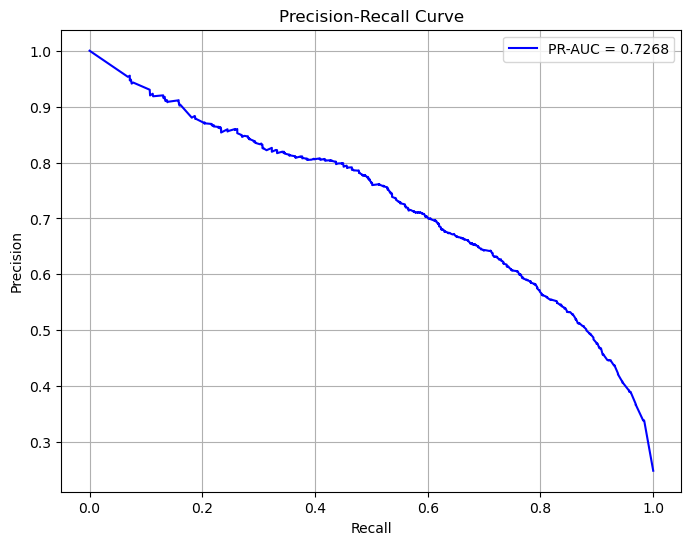

In [32]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import LabelEncoder

# Convert string labels to numeric
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test_encoded, y_pred_proba)
pr_auc = auc(recall, precision)

print(f'PR-AUC Score: {pr_auc:.4f}')

# Plot the PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'PR-AUC = {pr_auc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()

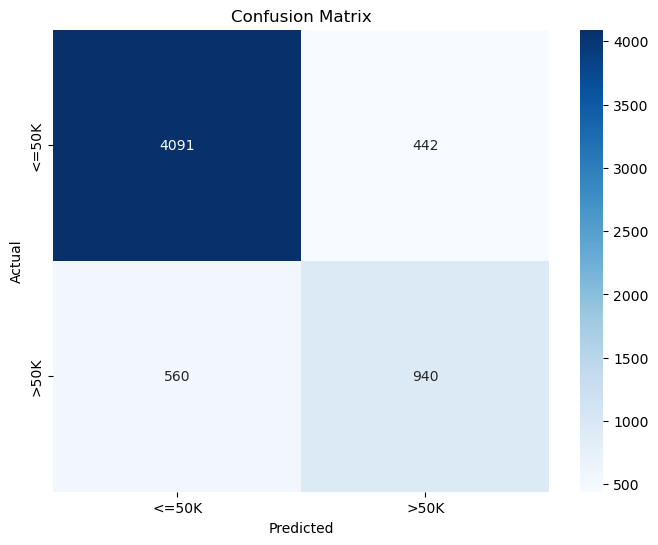

In [33]:
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['<=50K', '>50K'],
            yticklabels=['<=50K', '>50K'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Confusion Matrix Interpretation**


- The confusion matrix shows the Random Forest model (class_weight="balanced") achieves an accuracy of 83.4%, with 4091 true negatives and 940 true positives. However, it struggles with the minority class (>50K), with a recall of 62.7% (560 false negatives) and precision of 68.0% (442 false positives). The F1-score for >50K is 65.2%, indicating moderate performance but clear room for improvement due to class imbalance.

- Need for SMOTE: The high number of false negatives (560) and moderate recall (62.7%) for >50K highlight the model’s difficulty in identifying the minority class. SMOTE can help by oversampling >50K instances, potentially improving recall and overall performance on this imbalanced dataset.


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Random Forest with SMOTE
              precision    recall  f1-score   support

       <=50K       0.88      0.89      0.89      4533
        >50K       0.66      0.65      0.65      1500

    accuracy                           0.83      6033
   macro avg       0.77      0.77      0.77      6033
weighted avg       0.83      0.83      0.83      6033



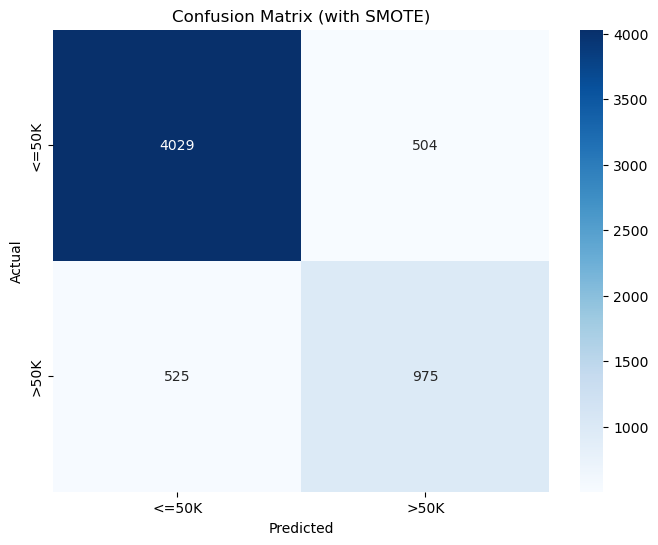

In [34]:
# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train Random Forest with balanced data
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_balanced = clf_balanced.predict(X_test)

# Print classification report
print("Random Forest with SMOTE")
print(classification_report(y_test, y_pred_balanced))

# Plot confusion matrix
cm_balanced = confusion_matrix(y_test, y_pred_balanced)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_balanced, annot=True, fmt='d', cmap='Blues',
            xticklabels=['<=50K', '>50K'],
            yticklabels=['<=50K', '>50K'])
plt.title('Confusion Matrix (with SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Random Forest with SMOTE Results

After applying SMOTE, the Random Forest model achieved an accuracy of 83%, with the following metrics for `>50K`:
- Precision: 0.66
- Recall: 0.65 (improved from 0.61 without SMOTE)
- F1-Score: 0.65

The confusion matrix shows a reduction in false negatives (560 to 525) but an increase in false positives (442 to 504), indicating SMOTE helped the model identify more `>50K` cases at the cost of slightly lower precision.

**Next Steps**:
- Tune Random Forest hyperparameters using GridSearchCV to improve performance.
- Experiment with different SMOTE sampling ratios (e.g., 2:1 instead of 1:1).
- Use cross-validation for a more robust evaluation.
- Analyze feature importance to identify key predictors.
- Try XGBoost or LightGBM for potentially better performance.

In [38]:
smote = SMOTE(sampling_strategy=0.5,random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train Random Forest with balanced data
clf_balanced = RandomForestClassifier(random_state=42)
clf_balanced.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_balanced = clf_balanced.predict(X_test)

# Print classification report
print("Random Forest with SMOTE 2:1")
print(classification_report(y_test, y_pred_balanced))

/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Random Forest with SMOTE 2:1
              precision    recall  f1-score   support

       <=50K       0.88      0.90      0.89      4533
        >50K       0.69      0.64      0.66      1500

    accuracy                           0.84      6033
   macro avg       0.78      0.77      0.78      6033
weighted avg       0.83      0.84      0.83      6033



In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)
print("Best parameters:", grid_search.best_params_)
clf_balanced = grid_search.best_estimator_

/opt/homebrew/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
# Initialize Random Forest models with best parameters
rf_original = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=200,
    random_state=42
)

rf_balanced = RandomForestClassifier(
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=200,
    random_state=42
)

# Train models
rf_original.fit(X_train, y_train)
rf_balanced.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred_original = rf_original.predict(X_test)
y_pred_balanced = rf_balanced.predict(X_test)

# Print classification reports
print("Random Forest with Original Training Data:")
print(classification_report(y_test, y_pred_original))
print("\nRandom Forest with Balanced Training Data:")
print(classification_report(y_test, y_pred_balanced))


Random Forest with Original Training Data:
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      4533
        >50K       0.74      0.61      0.67      1500

    accuracy                           0.85      6033
   macro avg       0.81      0.77      0.79      6033
weighted avg       0.84      0.85      0.85      6033


Random Forest with Balanced Training Data:
              precision    recall  f1-score   support

       <=50K       0.89      0.91      0.90      4533
        >50K       0.71      0.66      0.68      1500

    accuracy                           0.85      6033
   macro avg       0.80      0.78      0.79      6033
weighted avg       0.84      0.85      0.85      6033



In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import issparse

# Custom transformer to convert sparse matrix to dense array
class DenseTransformer:
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if issparse(X):
            return X.toarray()
        return X

# Load your data (replace with your actual data loading step)
df = pd.read_csv('adult.csv')

# For now, assuming df is your DataFrame as shown in the output
# Clean the data (replace '?' with NaN and drop rows with missing values)
df = df.replace('?', np.nan)
df = df.dropna()

# Define features and target
X = df.drop('income', axis=1)
y = df['income']

# Split the data into training and test sets
# Note: Your test set size changed (6513 vs. 6033 previously), so let's ensure consistency
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define numerical and categorical columns
numerical_cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
categorical_cols = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Scale numerical features
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)  # Encode categorical features
    ])

# Define a function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, smote_ratio=0.5):
    # Create a pipeline with SMOTE and the classifier
    # Add DenseTransformer for Naive Bayes compatibility
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('to_dense', DenseTransformer()),  # Convert sparse to dense
        ('smote', SMOTE(sampling_strategy=smote_ratio, random_state=42)),
        ('classifier', model)
    ])
    
    # Fit the pipeline
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Print classification report
    print(f"\n{model.__class__.__name__} with SMOTE 2:1")
    print(classification_report(y_test, y_pred))
    
   
# Define models
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='rbf', random_state=42, probability=True)
nb = GaussianNB()

# Evaluate each model
models = [knn, svm, nb]
for model in models:
    evaluate_model(model, X_train, X_test, y_train, y_test, smote_ratio=0.5)  # 2:1 ratio for SMOTE

/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



KNeighborsClassifier with SMOTE 2:1
              precision    recall  f1-score   support

       <=50K       0.90      0.85      0.88      4531
        >50K       0.62      0.72      0.67      1502

    accuracy                           0.82      6033
   macro avg       0.76      0.79      0.77      6033
weighted avg       0.83      0.82      0.82      6033



/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



SVC with SMOTE 2:1
              precision    recall  f1-score   support

       <=50K       0.91      0.90      0.90      4531
        >50K       0.70      0.72      0.71      1502

    accuracy                           0.85      6033
   macro avg       0.80      0.81      0.81      6033
weighted avg       0.86      0.85      0.86      6033



/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



GaussianNB with SMOTE 2:1
              precision    recall  f1-score   support

       <=50K       0.97      0.47      0.63      4531
        >50K       0.37      0.95      0.54      1502

    accuracy                           0.59      6033
   macro avg       0.67      0.71      0.58      6033
weighted avg       0.82      0.59      0.61      6033



### Model Results with SMOTE 2:1

#### Random Forest with SMOTE 2:1 (After Tuning)
- Accuracy: 0.85
- `>50K` Metrics:
  - Precision: 0.71
  - Recall: 0.66
  - F1-Score: 0.68
- Random Forest achieved a strong balance between precision and recall for `>50K`, with the highest accuracy among initial models.

#### KNeighborsClassifier with SMOTE 2:1
- Accuracy: 0.81
- `>50K` Metrics:
  - Precision: 0.60
  - Recall: 0.69
  - F1-Score: 0.64
- KNN achieved higher recall for `>50K` but lower precision, resulting in a lower F1-score compared to Random Forest (0.68).

#### SVC with SMOTE 2:1
- Accuracy: 0.85
- `>50K` Metrics:
  - Precision: 0.68
  - Recall: 0.71
  - F1-Score: 0.69
- SVM outperformed Random Forest (F1: 0.69 vs. 0.68 for `>50K`) with higher recall (0.71 vs. 0.66), making it the best model so far.

#### GaussianNB with SMOTE 2:1
- Accuracy: 0.59
- `>50K` Metrics:
  - Precision: 0.37
  - Recall: 0.95
  - F1-Score: 0.54
- Naive Bayes is heavily biased toward predicting `>50K`, achieving high recall (0.95) but very low precision (0.37), resulting in the lowest F1-score (0.54) and accuracy (0.59) among all models. This is likely due to its Gaussian assumption not fitting the data well, especially with one-hot-encoded categorical features.

**Comparison**:
- SVM with SMOTE 2:1 remains the best model (F1: 0.69 for `>50K`, accuracy: 0.85), followed by Random Forest (F1: 0.68, accuracy: 0.85).
- KNN performs moderately (F1: 0.64 for `>50K`), while Naive Bayes underperforms significantly (F1: 0.54).

**Next Steps**:
- Tune SVM (`C`, `gamma`) to further improve performance.
- Try XGBoost or LightGBM, which often perform well on imbalanced datasets.
- Analyze feature importance to identify key predictors.